# Modelling
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
# listwise deletion
data = data.dropna() # REMOVE missing data
print('SHAPE IS:',data.shape)
print('COLUMNS ARE:',list(data.columns))

SHAPE IS: (41188, 21)
COLUMNS ARE: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# 
The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [13]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# 

Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”


In [6]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [7]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data exploration

In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [11]:
# sns.countplot(x='y', data=data, palette='hls') # HSL (hue, saturation, lightness) Get a set of evenly spaced colors in HLS hue space.

In [16]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


# 
Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration

In [14]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


#    

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.


<AxesSubplot:xlabel='job'>

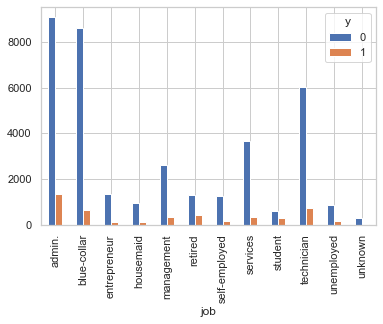

In [15]:
pd.crosstab(data.job,data.y).plot(kind='bar')

# 
The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

<AxesSubplot:xlabel='education'>

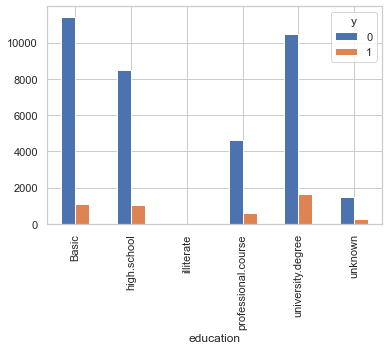

In [17]:
pd.crosstab(data.education,data.y).plot(kind='bar')

<AxesSubplot:xlabel='month'>

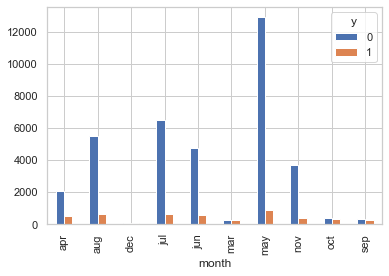

In [18]:
pd.crosstab(data.month,data.y).plot(kind='bar')

# EXPLORING ALL COLUMNS

In [19]:
data = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','month','day_of_week','poutcome', 'contact'], drop_first=True)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = data.loc[:,data.columns!='y']
y = data.loc[:,data.columns=='y']

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 51)
(10297, 51)
(30891, 1)
(10297, 1)


In [24]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

C:\Users\NITESHKUMAR G\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\NITESHKUMAR G\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
preds = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,preds)

0.9064776148392736

In [27]:
confusion_matrix(y_test, preds)

array([[8886,  245],
       [ 718,  448]], dtype=int64)